# Financial Analysis of Indian Banks

## Importing Libraries

In [49]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [67]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import chart_studio.plotly as py

In [68]:
init_notebook_mode(connected=True)
cf.go_offline()

## Collecting Data

In [51]:
start_date = datetime.datetime(2006, 1, 1)             # From 2006
end_date = datetime.datetime(2020, 1, 1)              # To 2020

**Data**

*NSE = National Stock Exchange of India*

*Bank Name = Bank's NSE Code*
1. State Bank of India = 'SBIN.NS'      
2. HDFC Bank = 'HDFCBANK.NS'
3. Axis Bank = 'AXISBANK.NS'
4. Kotak Mahindra Bank = 'KOTAKBANK.NS'
5. Bank of Baroda = 'BANKBARODA.NS'
6. Punjab National Bank = 'PNB.NS'
7. ICICI Bank = 'ICICIBANK.NS'
8. YES Bank = 'YESBANK.NS'

### Creating DataFrames

In [52]:
SBI = data.DataReader("SBIN.NS", data_source='yahoo', start=start_date, end=end_date)
HDFC = data.DataReader("HDFCBANK.NS", data_source='yahoo', start=start_date, end=end_date)
AXIS = data.DataReader("AXISBANK.NS", data_source='yahoo', start=start_date, end=end_date)
BOB = data.DataReader("BANKBARODA.NS", data_source='yahoo', start=start_date, end=end_date)
PNB = data.DataReader("PNB.NS", data_source='yahoo', start=start_date, end=end_date)
ICICI = data.DataReader("ICICIBANK.NS", data_source='yahoo', start=start_date, end=end_date)
YESBANK = data.DataReader("YESBANK.NS", data_source='yahoo', start=start_date, end=end_date)
KOTAK = data.DataReader("KOTAKBANK.NS", data_source='yahoo', start=start_date, end=end_date)

#### List of the ticker symbols (as strings) in alphabetical order

In [53]:
tickers = 'SBI HDFCBANK AXISBANK BANKBARODA PNB ICICIBANK YESBANK KOTAKBANK'.split()
tickers.sort()
tickers

['AXISBANK',
 'BANKBARODA',
 'HDFCBANK',
 'ICICIBANK',
 'KOTAKBANK',
 'PNB',
 'SBI',
 'YESBANK']

### Create a Single DataFrame by Concatenating all the above DataFrames

In [55]:
bank_stocks = pd.concat([AXIS, BOB, HDFC, ICICI, KOTAK, PNB, SBI, YESBANK], axis=1, keys=tickers)

In [56]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [57]:
bank_stocks.head()

Bank Ticker   AXISBANK                                                         \
Stock Info        High        Low       Open      Close     Volume  Adj Close   
Date                                                                            
2006-01-02   58.700001  57.299999  58.400002  57.660000   715590.0  33.252323   
2006-01-03   58.759998  57.700001  58.040001  57.919998   419965.0  33.402260   
2006-01-04   59.750000  58.200001  58.599998  59.299999  1448085.0  34.198097   
2006-01-05   61.099998  58.810001  59.299999  60.740002  3013255.0  35.028542   
2006-01-06   63.099998  60.820000  61.799999  62.770000  2035155.0  36.199238   

Bank Ticker BANKBARODA                                   ...        SBI  \
Stock Info        High        Low       Open      Close  ...       Open   
Date                                                     ...              
2006-01-02   48.900002  48.020000  48.310001  48.380001  ...  86.096298   
2006-01-03   49.700001  48.400002  48.599998  49.139999  ...  85.681099   
2006-01-04   52.180000  50.000000  50.000000  51.470001  ...  86.398201   
2006-01-05   52.759998  51.480000  51.759998  52.290001  ...  86.954903   
2006-01-06   52.900002  51.599998  52.400002  51.990002  ...  88.785301   

Bank Ticker                                   YESBANK                       \
Stock Info       Close      Volume  Adj Close    High    Low   Open  Close   
Date                                                                         
2006-01-02   85.379204  21240601.0  18.207844   13.90  13.64  13.80  13.67   
2006-01-03   86.053802  17462402.0  18.351706   14.24  13.70  13.72  13.90   
2006-01-04   86.605797  19420938.0  18.469419   14.00  13.70  13.99  13.79   
2006-01-05   88.813599  42574672.0  18.940254   14.68  13.75  13.98  14.32   
2006-01-06   88.705101  23846596.0  18.917118   14.53  13.95  14.30  14.29   

Bank Ticker                       
Stock Info      Volume Adj Close  
Date                              
2006-01-02    401370.0  8.773472  
2006-01-03   1711690.0  8.921084  
2006-01-04    771330.0  8.850487  
2006-01-05   8755585.0  9.190643  
2006-01-06   3368195.0  9.171390  

[5 rows x 48 columns]

# Exploratory Data Analysis (EDA)

### Maximum Close Price for each Bank's Stock

In [58]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
AXISBANK       822.799988
BANKBARODA     225.580002
HDFCBANK      1302.400024
ICICIBANK      549.400024
KOTAKBANK     1729.500000
PNB            277.079987
SBI            372.399994
YESBANK        394.000000
dtype: float64

## A New DataFrame called returns
This dataframe will contain the returns for each bank's stock. returns are typically defined by:*

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

$where:$
    $$r_t = returnDate$$
    $$p_t = priceAtDate$$
    $$p_{t-1} = priceAtPreviousDate$$

In [59]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

Pandas **dataframe.pct_change()** function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [60]:
returns.head()

,AXISBANK Return,BANKBARODA Return,HDFCBANK Return,ICICIBANK Return,KOTAKBANK Return,PNB Return,SBI Return,YESBANK Return
Date,,,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.004509,0.015709,-0.000210,0.015920,0.043092,0.002966,0.007901,0.016825
2006-01-04,0.023826,0.047416,0.026286,0.011871,0.016610,0.023236,0.006415,-0.007914
2006-01-05,0.024283,0.015932,0.010177,-0.014913,0.026602,0.020334,0.025493,0.038434
2006-01-06,0.033421,-0.005737,0.039824,-0.007278,-0.021220,-0.010116,-0.001222,-0.002095


## Pair Plot of the 'returns' DataFrame

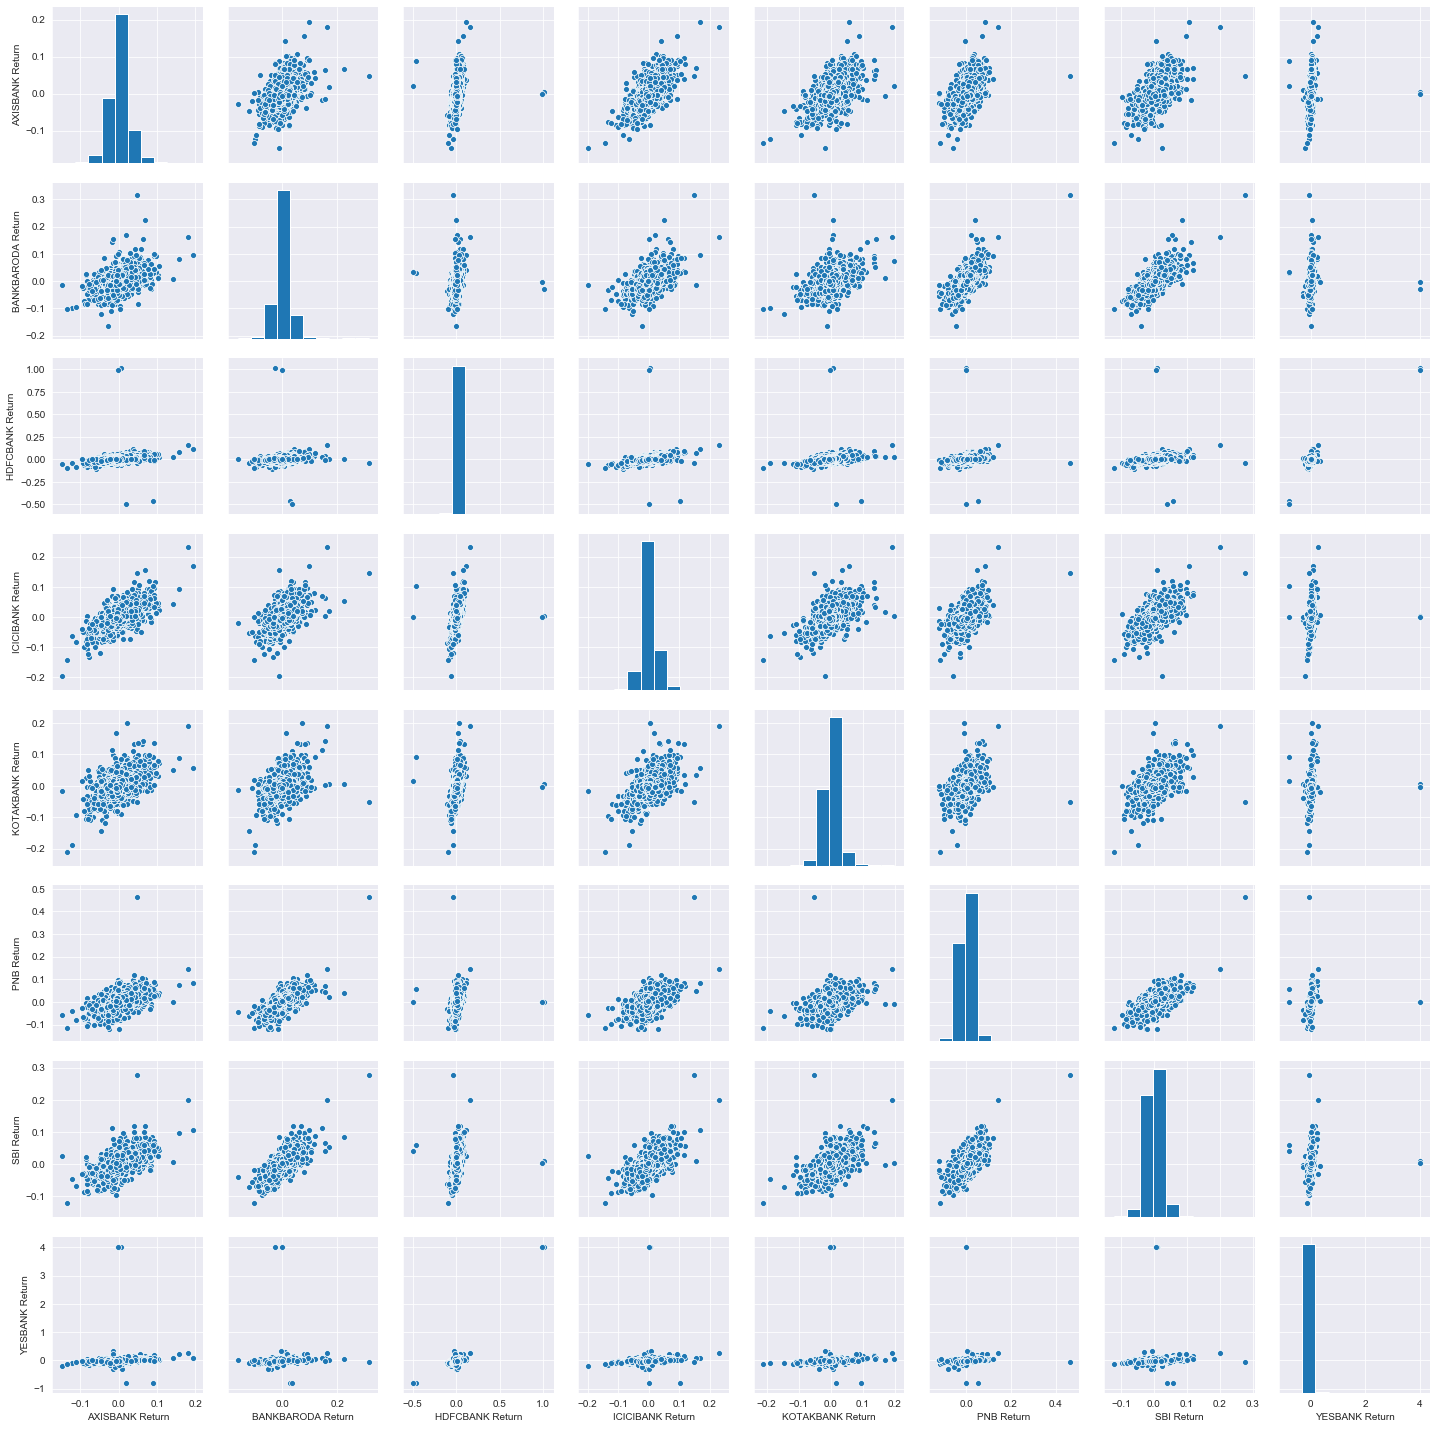

In [298]:
sns.pairplot(returns[1:])

## The Best and The Worst Single Day Returns

### Worst Returns

In [62]:
returns.idxmin()

AXISBANK Return     2008-10-10
BANKBARODA Return   2018-09-18
HDFCBANK Return     2009-10-14
ICICIBANK Return    2008-10-10
KOTAKBANK Return    2008-10-24
PNB Return          2018-02-27
SBI Return          2008-10-24
YESBANK Return      2009-10-14
dtype: datetime64[ns]

From the above data, it can be seen that 'October 2008' have the worst returns for most of the banks.

Reason behind this is the [Global financial crisis in October 2008](https://en.wikipedia.org/wiki/Global_financial_crisis_in_October_2008).  

### Best Returns

In [63]:
returns.idxmax()

AXISBANK Return     2008-10-13
BANKBARODA Return   2017-10-25
HDFCBANK Return     2009-04-30
ICICIBANK Return    2009-05-18
KOTAKBANK Return    2006-06-09
PNB Return          2017-10-25
SBI Return          2017-10-25
YESBANK Return      2009-04-30
dtype: datetime64[ns]

## The Standard Deviation of the Returns

### For The Entire Time Period

In [65]:
returns.std()

AXISBANK Return      0.025769
BANKBARODA Return    0.026870
HDFCBANK Return      0.032341
ICICIBANK Return     0.025637
KOTAKBANK Return     0.025196
PNB Return           0.026570
SBI Return           0.023571
YESBANK Return       0.103919
dtype: float64

Yes Bank stocks would be classified as to be the riskiest over the entire time period.

### For 2019

In [101]:
returns.loc['2019-01-01':'2020-01-01'].std()

AXISBANK Return      0.016793
BANKBARODA Return    0.024989
HDFCBANK Return      0.012439
ICICIBANK Return     0.017848
KOTAKBANK Return     0.013811
PNB Return           0.025545
SBI Return           0.021790
YESBANK Return       0.061807
dtype: float64

### For 2009

In [125]:
returns.loc['2009-01-01':'2010-01-01'].std()

AXISBANK Return      0.037450
BANKBARODA Return    0.030010
HDFCBANK Return      0.104098
ICICIBANK Return     0.040256
KOTAKBANK Return     0.039944
PNB Return           0.030663
SBI Return           0.031660
YESBANK Return       0.376122
dtype: float64

## Dist Plot of the 2008 returns for State Bank of India

In [184]:
sns.set_style('darkgrid')

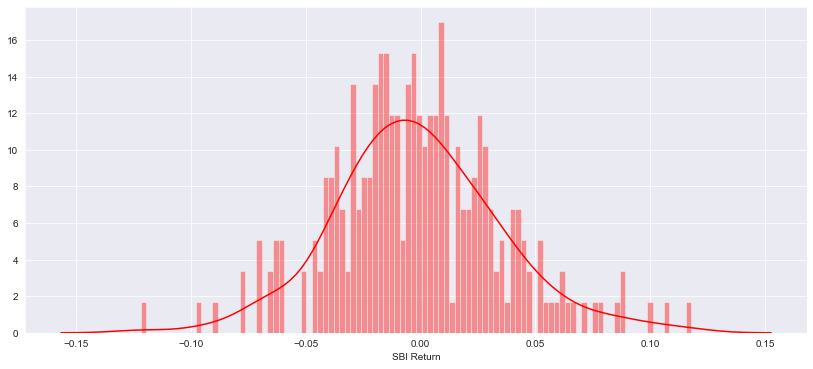

In [185]:
plt.figure(figsize=(14,6))
sns.distplot(returns['2008-01-01':'2009-01-01']['SBI Return'], color='red', bins=100)

## Dist Plot of the 2015 returns for YES Bank

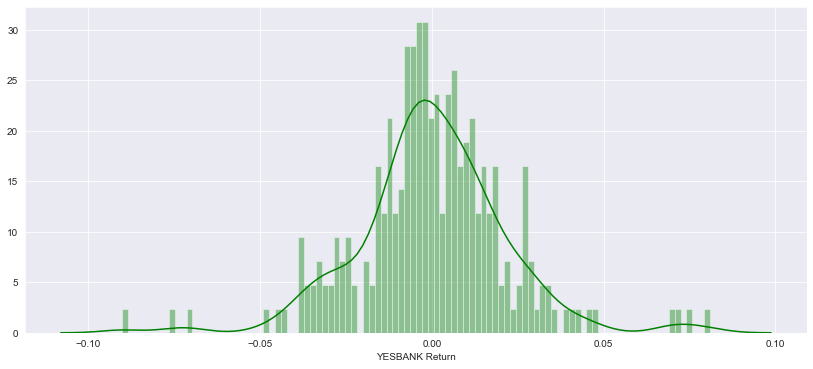

In [186]:
plt.figure(figsize=(14,6))
sns.distplot(returns['2015-01-01':'2016-01-01']['YESBANK Return'], color='green', bins=100)

## Dist Plot of the 2009 returns for YES Bank

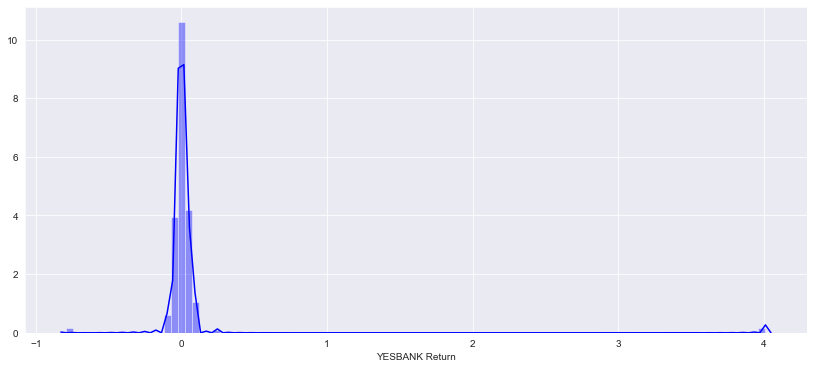

In [187]:
plt.figure(figsize=(14,6))
sns.distplot(returns['2009-01-01':'2010-01-01']['YESBANK Return'], color='blue', bins=100)

# More Visualization

### Line Plot showing Close Price for each bank for the entire index of time

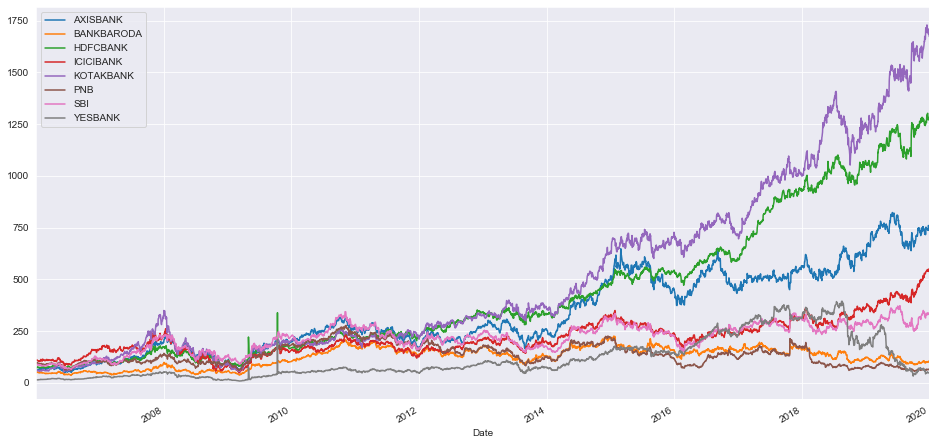

In [188]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(16,8))
plt.legend()

# OR
# bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(16,8))

### Line Plot to compare SBI with YES Bank

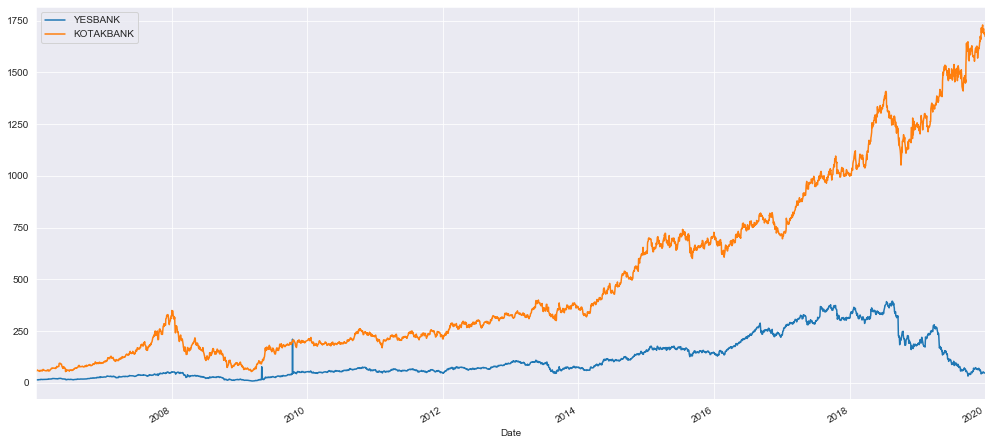

In [189]:
bank_stocks['YESBANK']['Close'].plot(label='YESBANK', figsize=(17,8))
bank_stocks['KOTAKBANK']['Close'].plot(label='KOTAKBANK', figsize=(17,8))
plt.legend(loc = 2)

## Interactive Plot with Plotly

In [237]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## 180 Days Moving Average Plot

### AXIS Bank

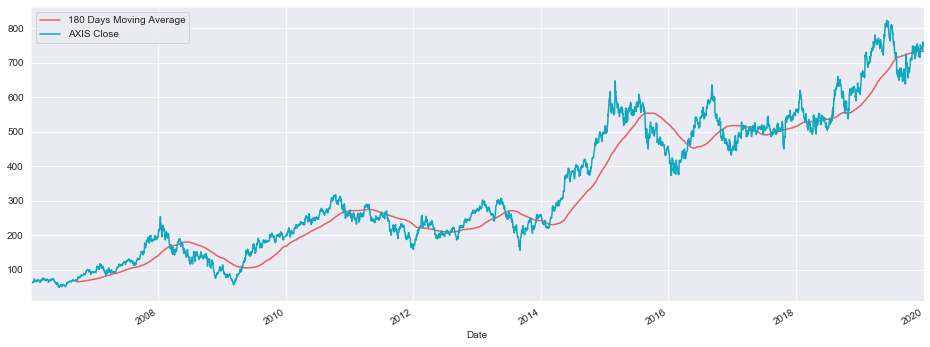

In [274]:
plt.figure(figsize=(16,6))
AXIS['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#e36262')
AXIS['Close'].loc['2006-01-01':'2020-01-01'].plot(label='AXIS Close', color='#0fa8bf')
plt.legend()

### Bank of Baroda

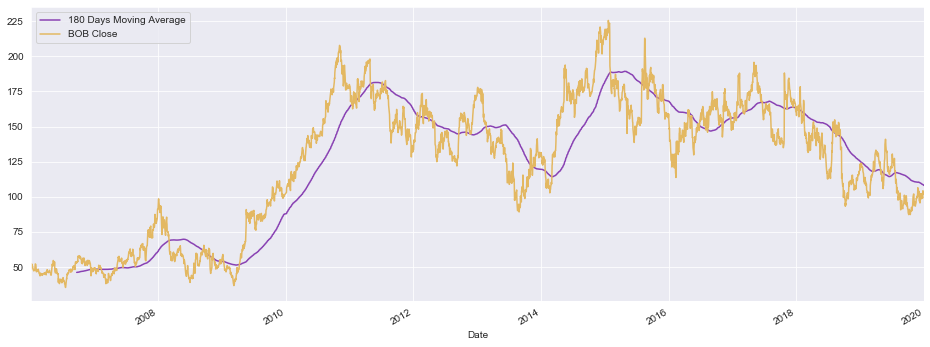

In [276]:
plt.figure(figsize=(16,6))
BOB['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#8942b3')
BOB['Close'].loc['2006-01-01':'2020-01-01'].plot(label='BOB Close', color='#e3b862')
plt.legend(loc=2)

### HDFC Bank

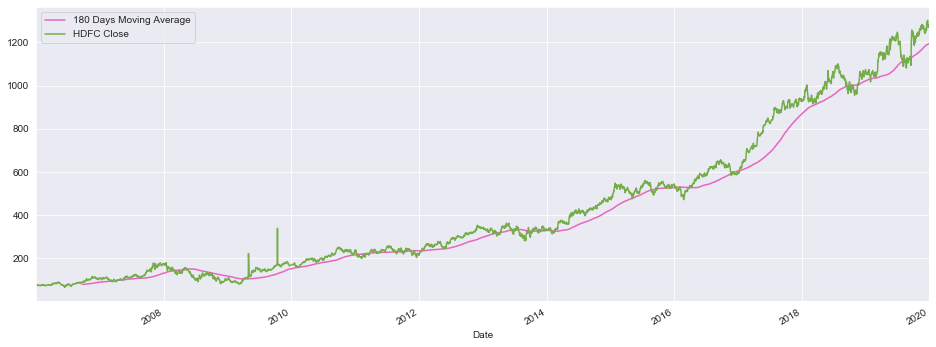

In [277]:
plt.figure(figsize=(16,6))
HDFC['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#e866bf')
HDFC['Close'].loc['2006-01-01':'2020-01-01'].plot(label='HDFC Close', color='#74ad49')
plt.legend()

### ICICI Bank

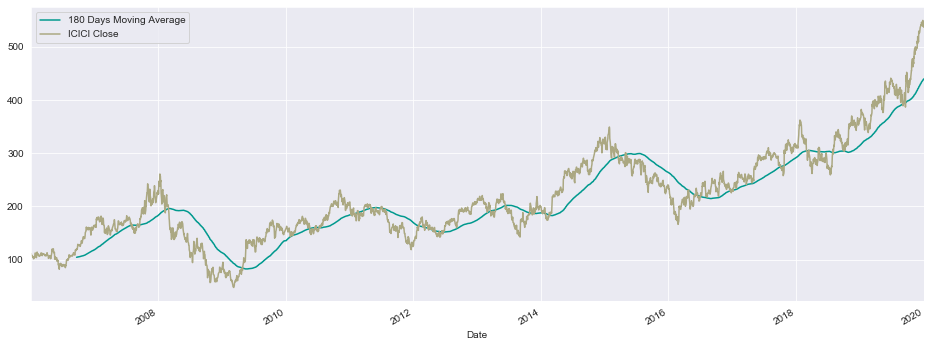

In [280]:
plt.figure(figsize=(16,6))
ICICI['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#00998e')
ICICI['Close'].loc['2006-01-01':'2020-01-01'].plot(label='ICICI Close', color='#aba882')
plt.legend()

### Kotak Mahindra Bank

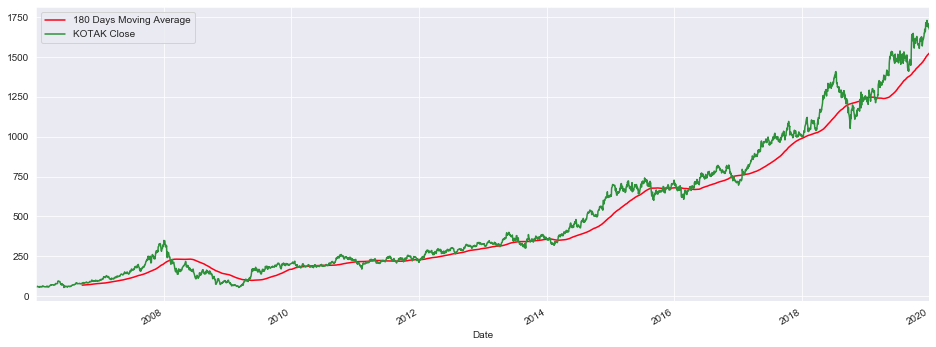

In [295]:
plt.figure(figsize=(16,6))
KOTAK['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#ff0015')
KOTAK['Close'].loc['2006-01-01':'2020-01-01'].plot(label='KOTAK Close', color='#2d9139')
plt.legend()

### Punjab National Bank

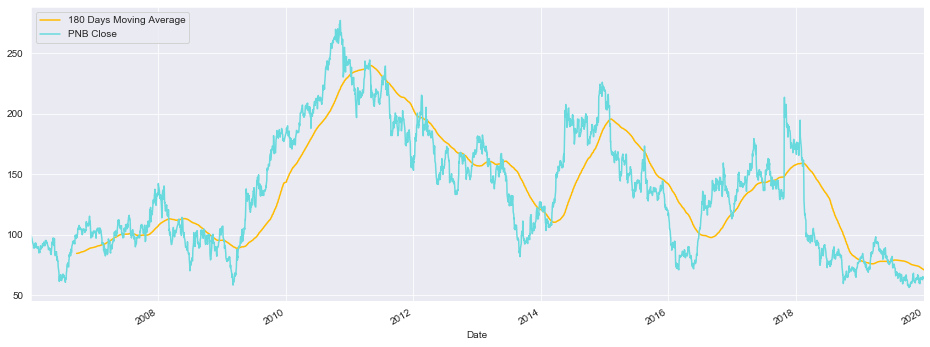

In [296]:
plt.figure(figsize=(16,6))
PNB['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#ffbb00')
PNB['Close'].loc['2006-01-01':'2020-01-01'].plot(label='PNB Close', color='#68dade')
plt.legend(loc=2)

### State Bank of India

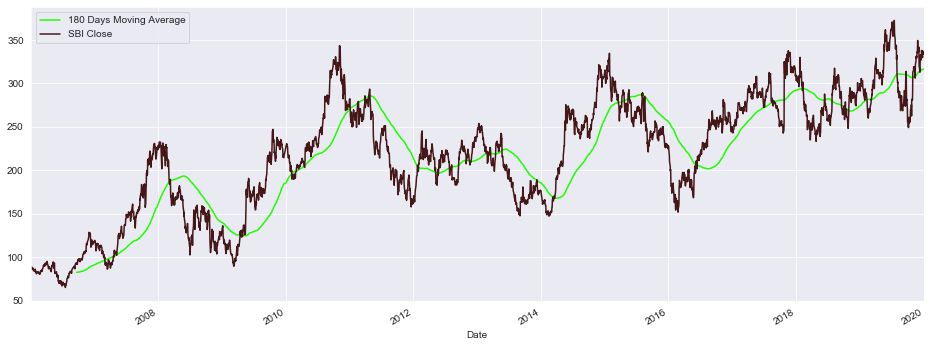

In [292]:
plt.figure(figsize=(16,6))
SBI['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#1eff00')
SBI['Close'].loc['2006-01-01':'2020-01-01'].plot(label='SBI Close', color='#451717')
plt.legend()

### YES Bank

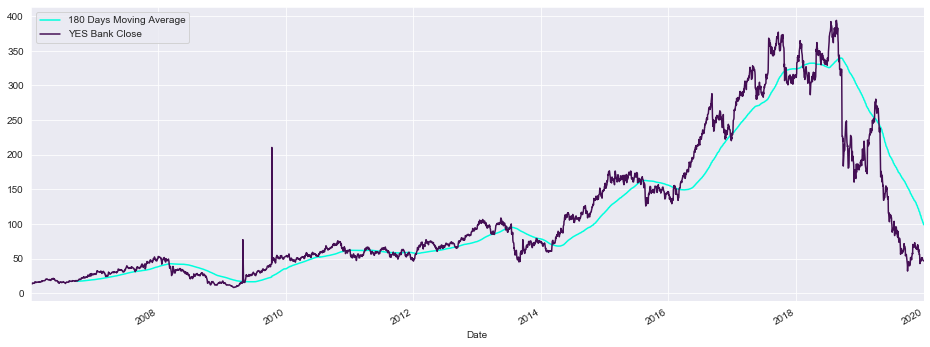

In [293]:
plt.figure(figsize=(16,6))
YESBANK['Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#00ffdd')
YESBANK['Close'].loc['2006-01-01':'2020-01-01'].plot(label='YES Bank Close', color='#440f54')
plt.legend()

# Heatmap

In [205]:
bank_cr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()           # correlation
bank_cr

Bank Ticker,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,KOTAKBANK,PNB,SBI,YESBANK
Bank Ticker,,,,,,,,
AXISBANK,1.000000,0.543119,0.937027,0.923244,0.941415,-0.087393,0.832346,0.742828
BANKBARODA,0.543119,1.000000,0.367871,0.438493,0.337565,0.688156,0.758584,0.516881
HDFCBANK,0.937027,0.367871,1.000000,0.905572,0.993278,-0.261551,0.732062,0.762540
ICICIBANK,0.923244,0.438493,0.905572,1.000000,0.915634,-0.091402,0.817853,0.592069
KOTAKBANK,0.941415,0.337565,0.993278,0.915634,1.000000,-0.297675,0.720576,0.736731
PNB,-0.087393,0.688156,-0.261551,-0.091402,-0.297675,1.000000,0.384245,-0.032125
SBI,0.832346,0.758584,0.732062,0.817853,0.720576,0.384245,1.000000,0.617668
YESBANK,0.742828,0.516881,0.762540,0.592069,0.736731,-0.032125,0.617668,1.000000


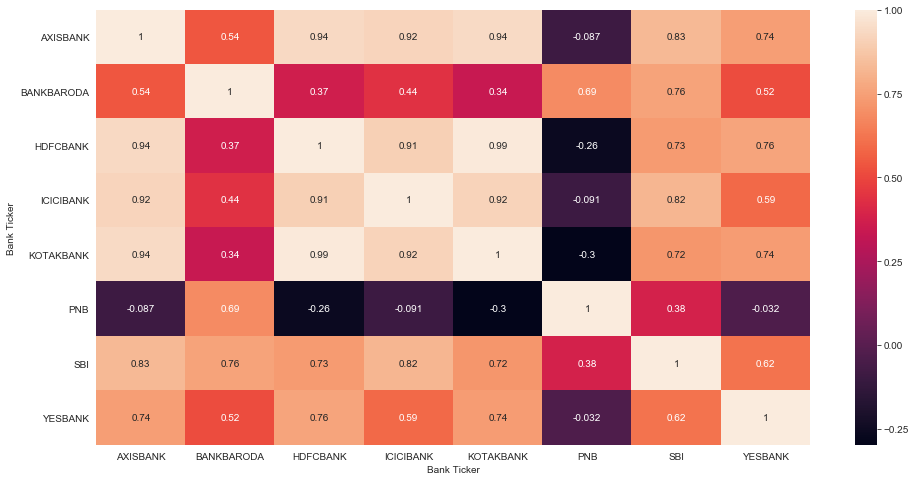

In [211]:
plt.figure(figsize=(16,8))
sns.heatmap(bank_cr, annot=True)

# Clustermap

<Figure size 1152x576 with 0 Axes>

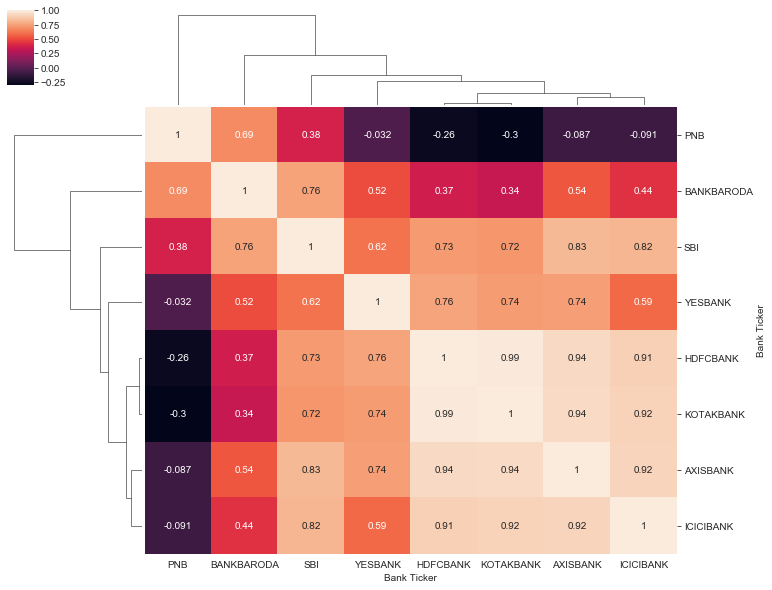

In [219]:
plt.figure(figsize=(16,8))
sns.clustermap(bank_cr, annot=True, figsize=(12,10))

# Interactive Plots

## Candle Plot

A candlestick chart is a style of financial chart used to describe price movements of a security, derivative, or currency.

#### AXIS Bank 2019 Data

In [229]:
AXIS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-02,58.700001,57.299999,58.400002,57.660000,715590.0,33.252323
2006-01-03,58.759998,57.700001,58.040001,57.919998,419965.0,33.402260
2006-01-04,59.750000,58.200001,58.599998,59.299999,1448085.0,34.198097
2006-01-05,61.099998,58.810001,59.299999,60.740002,3013255.0,35.028542
2006-01-06,63.099998,60.820000,61.799999,62.770000,2035155.0,36.199238


In [270]:
axis19 = AXIS[['High','Low','Open','Close']].loc['2018-01-01':'2020-01-01']
axis19.iplot(kind='candle')

#### ICICI Bank 2019 Data

In [235]:
icici19 = ICICI[['High','Low','Open','Close']].loc['2019-01-01':'2020-01-01']
icici19.iplot(kind='candle')

# Conclusions:
* **It has seen that 'October 2008' have the worst returns for most of the banks. Reason behind this is the [global financial crisis in October 2008](https://en.wikipedia.org/wiki/Global_financial_crisis_in_October_2008).**
* **Yes Bank stocks would be classified as to be the riskiest over the entire period. Although it shows good growth from the start of 2014 till the third month on 2019, but then the stocks started to fall.**
* **Punjab National Bank and Bank of Baroda stocks started to fall from early 2018.**
* **Kotak Mahindra Bank stocks show the best growth over other banks.**